Simple example with one bin corresponding to the general analysis in Section 2. 

Number of events $n$ for measurement expected to follow a Poisson distribution:

\begin{equation}
E(n) = \mu s + b,
\end{equation}

where $\mu$ is the signal strength parameter; $\mu = 0$ corresponds to no signal and $\mu =1 $ corresponds to full signal.

Also perform a background measurement $m$:
\begin{equation}
E(m) = \tau b,
\end{equation}
where $\tau$ is the background strength parameter. The background $b$ is treated as a nuisance parameter.

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Define known parameters given to us by the model.
s = 10
tau = 1
pi = math.pi

def L(mu,n,m,b): # Likelihood function
    mean_events = mu*s+b
    Pois_SB = pow(mean_events,n)*np.exp(-mean_events)/math.factorial(n)
    Pois_B = pow(tau*b,m)*np.exp(-tau*b)/math.factorial(m)
    return Pois_B*Pois_SB
    
def q(mu,n,m,b): # test statistic q_mu
    mu_hat = (n-(m/tau))/s # Unconditional maximum likelihood (ML) estimator for mu
#     print("mu_hat = " + str(mu_hat))
    b_hat = m/tau # Unconditional maximum ML for b
#     print("b_hat = " + str(b_hat))
    tpo = 1 + tau # tau + 1
    factor = -(tpo*mu*s) + n + m # factor in b_hathat
    b_hathat = (factor + np.sqrt(4*tpo*m*mu*s+pow(factor,2)))/(2*tpo) # Conditional ML estimator for b (function of mu)
#     print("b_hathat = " + str(b_hathat))
#     print("L_num = " + str(L(mu,n,m,b_hathat)))
#     print("L_den = " + str(L(mu_hat,n,m,b_hat)))
    result = -2*np.log(L(mu,n,m,b_hathat)/L(mu_hat,n,m,b_hat))
#     print(result)
    return result

def q_A(mu,s,b): # test statistic for Asimov data
    return q(mu,s+b,b,b) # here we use that the data follows (n = mu*s + b) and (m = b) 

def f0_0(q): # Distribution of q_0 under assumption of mu = 0
    return np.exp(-q/2)/np.sqrt(2*pi*q)

def var_Asimov(mu,mu_prime,q): # Returns the variance of the parameter being tested (mu), assuming parameter mu_prime
    return pow(mu-mu_prime,2)/q

def f0_1_unnormed(q,s,b): # Distribution of q_0 under assumption of mu = 1 (NOT NORMALIZED)
    var = var_Asimov(0,1,q_A(0,s,b))
    result = np.exp(-0.5*(np.sqrt(q)-(1/np.sqrt(var)))**2)/np.sqrt(2*pi*q)
    return result

def f0_1_area(q,s,b): # Returns normalization factor
    xlist = np.arange(0.001,1000,0.1)
    area = np.trapz([f0_1_unnormed(x,s,b) for x in xlist],xlist)
    return area

# def f0_1(q,s,b): # Normalized Distribution of q_0 under assumption of mu = 1
#     return f0_1_unnormed(q,s,b)/f0_1_area(q,s,b)

def q0_dist(mu,runs,EE,BE): # Generates the distribution of the test statistic q0 with Poisson distributed data
    q0 = []
    for i in range(0,runs):
        n = np.random.poisson(EE)
        m = np.random.poisson(BE)
        q0.append(q(mu,n,m,BE))
    return q0

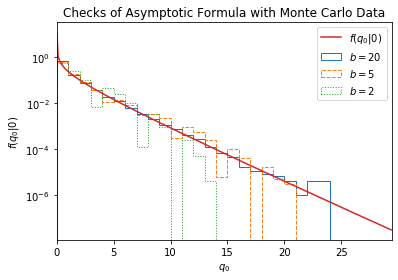

In [46]:
runs = 1000000
q0_20 = q0_dist(0,runs,20,20)
q0_5 = q0_dist(0,runs,5,5)
q0_2 = q0_dist(0,runs,2,2)

MAX = max([max(q0_20),max(q0_5),max(q0_2)])
plt.hist(q0_20,bins=np.arange(0,MAX,1),density = True,histtype='step',label='$b=20$') # Comment this to hide b = 20 data
plt.hist(q0_5,bins=np.arange(0,MAX,1),density = True,histtype='step',linestyle='--',label='$b=5$') # Comment this to hide b = 5 data
plt.hist(q0_2,bins=np.arange(0,MAX,1),density = True,histtype='step',linestyle=':',label='$b=2$') # Comment this to hide b = 2 data
plt.plot(np.arange(0.001,MAX,0.1),[f0_0(x) for x in np.arange(0.001,MAX,0.1)],label='$f(q_0|0)$')
plt.xlabel("$q_0$")
plt.ylabel("$f(q_0|0)$")
plt.xlim(0,MAX)
plt.yscale('log')
plt.legend()
plt.title("Checks of Asymptotic Formula with Monte Carlo Data")
plt.show()

Checks of the distribution formula for $q_0$ and $\mu = 0$ given in Cowan (Eq. 49) against Monte Carlo data with different background signals.

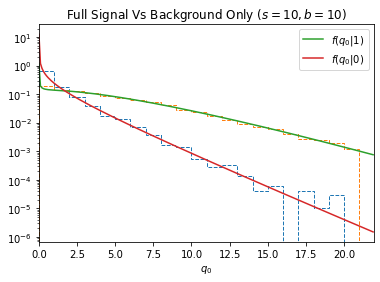

In [3]:
runs2 = 100000
q0_10 = q0_dist(0,runs2,10,10) # Background only, as above
q0_10_10 = q0_dist(0,runs2,20,10) # Nominal signal data

area_f0_1 = f0_1_area(0,10,10) 

MAX2 = max(q0_10)
plt.hist(q0_10,bins=np.arange(0,MAX2,1),density = True,histtype='step',linestyle='--') 
plt.hist(q0_10_10,bins=np.arange(0,MAX2,1),density = True,histtype='step',linestyle='--') 
plt.plot(np.arange(0.001,MAX2,0.1),[f0_1_unnormed(x,10,10)/area_f0_1 for x in np.arange(0.001,MAX2,0.1)],label='$f(q_0|1)$')
plt.plot(np.arange(0.001,MAX2,0.1),[f0_0(x) for x in np.arange(0.001,MAX2,0.1)],label='$f(q_0|0)$')
plt.yscale('log')
plt.title('Full Signal Vs Background Only ($s=10,b=10$)')
plt.legend()
plt.xlim(0,MAX2)
plt.xlabel('$q_0$')
plt.show()

Similar checks of the asymptotic distributions for full signal ($\mu = 1$) and no signal ($\mu=0$) hypotheses.

In [68]:
var_mu1 = var_Asimov(1,0,q_A(1,10,20))
var_mu2 = var_Asimov(1,0,q_A(0,10,20))

print(var_mu1)
print(var_mu2)

-inf
0.49663496164754556


/usr/common/software/python/3.7-anaconda-2019.07/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: divide by zero encountered in double_scalars
